In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster import hierarchy as sch
import numpy as np

In [5]:
path="/Users/user/Desktop/练习用jupyter notebook/"
data=path+"OM_profile_list_2.csv"

In [6]:
df1 = pd.read_csv(data, index_col=0)
df=df1.loc[ : , ~df1.columns.str.contains('Unnamed')]

In [4]:
def annotate_organisms(): # 生物分類の色つけ
    with open(path + 'KeggOrganisms/vertebrates.txt', 'r', encoding='utf-8') as ver,\
    open(path + 'KeggOrganisms/other_animals.txt', 'r', encoding='utf-8') as oth,\
    open(path + 'KeggOrganisms/plants.txt', 'r', encoding='utf-8') as pla,\
    open(path + 'KeggOrganisms/fungi.txt', 'r', encoding='utf-8') as fun,\
    open(path + 'KeggOrganisms/protists.txt', 'r', encoding='utf-8') as pro:
        vertebrates = ver.read().splitlines()
        other_animals = oth.read().splitlines()
        plants = pla.read().splitlines()
        fungi = fun.read().splitlines()
        protists = pro.read().splitlines()
    li=[]
    organ = df.columns
    organlist=pd.DataFrame({'Eukaryotes':organ})
    ver=0
    oth=0
    pla=0
    fun=0
    pro=0
    for i in organlist['Eukaryotes']:
        if i in vertebrates:
            li.append('#0000FF') #bule
            ver+=1
        elif i in other_animals:
            li.append('#FF0000') #red
            oth+=1
        elif i in plants:
            li.append('#9ACD32') #yellowgreen
            pla+=1
        elif i in fungi:
            li.append('#FFFF00') #yellow
            fun+=1
        elif i in protists:
            li.append('#745399') #江戸紫
            pro+=1
    print('--- Num of organisms ---')
    print('vertebrates\t', ver, '\n'\
          'other_animals\t', oth, '\n'\
          'plants\t', pla, '\n'\
          'fungi\t', fun, '\n'\
          'protists\t', pro, '\n'\)
    organlist['Eukaryotes'] = li
    return organlist.set_index('Eukaryotes') # はじめの列をindexへ
organisms_color = annotate_organisms()

SyntaxError: unexpected character after line continuation character (2384900211.py, line 41)

In [7]:
threshold =18
d=sch.distance.pdist(df)
L = sch.linkage(d, method='ward')
color_dict = {1:'pink', 2:'deepskyblue', 3:'lawngreen', 4:'gold',\
                    5:'orange', 6:'black', 7:'slategray'}
col_label = sch.fcluster(L,threshold,criterion='distance')
col_list = []
for i in col_label:
    col_list.append(color_dict[i])

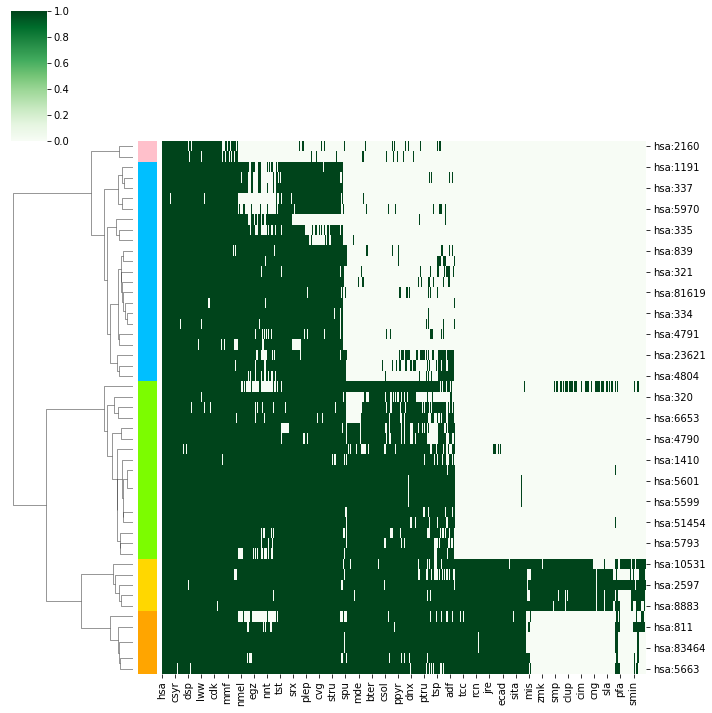

In [17]:
result=sns.clustermap(data=df,row_colors=col_list,method="ward",metric='euclidean',cmap=plt.get_cmap('Greens'),col_cluster = False)

In [18]:
clustered_data = result.data2d


In [19]:
clustered_data.to_csv("/Users/user/Desktop/aband/tree/cluster_profile.csv")

In [20]:
file={'KEGG_ID':df.index,'culster':col_label}
af_df=pd.DataFrame(file)
af_df.to_csv("/Users/user/Desktop/aband/tree/class.csv")
print("over")

over


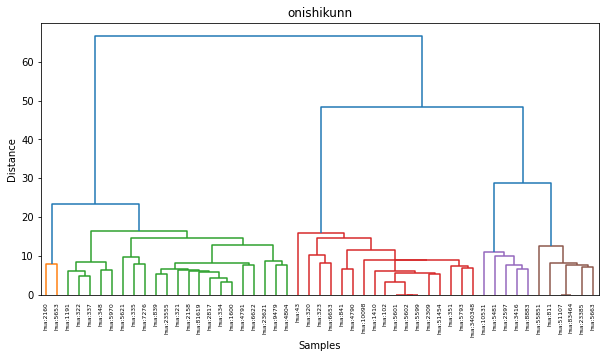

In [21]:
#系統tree
d = sch.distance.pdist(df,metric='euclidean')
Z = sch.linkage(d,metric='euclidean', method='ward')
plt.figure(figsize=(10, 5))
sch.dendrogram(Z, labels=df.index, color_threshold=18)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('onishikunn')
plt.show()